In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install fredapi
import fredapi as fd
import plotly.express as px

In [5]:
# Establishing the connection
fred = fd.Fred(api_key='671f2e0c08f809cc7247457e1776bbb7')

In [6]:
data = fred.search('Consumer Price Index for All Urban Consumers: All Items in U.S. City Average')
data.head(10)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2025-02-24,2025-02-24,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2025-01-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2025-02-12 07:43:49-06:00,95,The Consumer Price Index for All Urban Consume...
CPIAUCNS,CPIAUCNS,2025-02-24,2025-02-24,Consumer Price Index for All Urban Consumers: ...,1913-01-01,2025-01-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2025-02-12 07:43:49-06:00,73,Handbook of Methods (https://www.bls.gov/opub/...
CUUS0000SA0,CUUS0000SA0,2025-02-24,2025-02-24,Consumer Price Index for All Urban Consumers: ...,1984-01-01,2024-07-01,Semiannual,SA,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2025-01-15 07:40:23-06:00,46,None
CPILFESL,CPILFESL,2025-02-24,2025-02-24,Consumer Price Index for All Urban Consumers: ...,1957-01-01,2025-01-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2025-02-12 07:43:52-06:00,82,"The ""Consumer Price Index for All Urban Consum..."
CPILFENS,CPILFENS,2025-02-24,2025-02-24,Consumer Price Index for All Urban Consumers: ...,1957-01-01,2025-01-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2025-02-12 07:43:51-06:00,53,The “Consumer Price Index for All Urban Consum...
CUUS0000SA0L1E,CUUS0000SA0L1E,2025-02-24,2025-02-24,Consumer Price Index for All Urban Consumers: ...,1984-01-01,2024-07-01,Semiannual,SA,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2025-01-15 07:40:37-06:00,10,None
APU0000708111,APU0000708111,2025-02-24,2025-02-24,"Average Price: Eggs, Grade A, Large (Cost per ...",1980-01-01,2025-01-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2025-02-12 07:34:07-06:00,76,"Large white, Grade A chicken eggs, sold in a c..."
APU0000703112,APU0000703112,2025-02-24,2025-02-24,"Average Price: Ground Beef, 100% Beef (Cost pe...",1984-01-01,2025-01-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2025-02-12 07:34:04-06:00,68,Fresh regular 100% ground beef excluding round...
APU0000702111,APU0000702111,2025-02-24,2025-02-24,"Average Price: Bread, White, Pan (Cost per Pou...",1980-01-01,2025-01-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2025-02-12 07:34:02-06:00,68,All white pre-packaged regular bread regardles...


In [7]:
data['title'][0]

<ipython-input-7-9c26508e0e76>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['title'][0]


'Consumer Price Index for All Urban Consumers: All Items in U.S. City Average'

In [8]:
#Extracting all data points
cpi= fred.get_series('CPIAUCSL') #This retrieves the Consumer Price Index (CPI) for All Urban Consumers (CPIAUCSL) from the FRED (Federal Reserve Economic Data) API. This returns a time series (Pandas Series) with dates as the index and CPI values as the data.
cpi.name ='values' # This assigns the name 'values' to the Pandas Series, which helps in labeling when converting it to a DataFrame.
cpi

,values
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2024-09-01,314.851
2024-10-01,315.564
2024-11-01,316.449
2024-12-01,317.603


In [9]:
df = pd.DataFrame(cpi).reset_index()
df
#The command converts cpi into a Pandas DataFrame and resets its index. If cpi had a custom index (like years or dates), reset_index() moves it into a new column and replaces it with a default integer index. Finally, df displays the DataFrame

,index,values
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
932,2024-09-01,314.851
933,2024-10-01,315.564
934,2024-11-01,316.449
935,2024-12-01,317.603


In [10]:
df2 = df[df['index']>'1989-12-01'] #This command filters df to keep only rows from 1990
df2

,index,values
516,1990-01-01,127.500
517,1990-02-01,128.000
518,1990-03-01,128.600
519,1990-04-01,128.900
520,1990-05-01,129.100
...,...,...
932,2024-09-01,314.851
933,2024-10-01,315.564
934,2024-11-01,316.449
935,2024-12-01,317.603


In [11]:
# Drawing line plot of this data
fig = px.line(df2, x='index', y='values', title = 'CPI Avg. 1990-2025')
fig.show()

In [12]:
#Changing the column names
df2 = df2.rename(columns={'index': 'ds', 'values': 'y'})
df2

,ds,y
516,1990-01-01,127.500
517,1990-02-01,128.000
518,1990-03-01,128.600
519,1990-04-01,128.900
520,1990-05-01,129.100
...,...,...
932,2024-09-01,314.851
933,2024-10-01,315.564
934,2024-11-01,316.449
935,2024-12-01,317.603


In [15]:
from prophet import Prophet
ml = Prophet() #This creates an instance of the Prophet model with default settings.
ml.fit(df2) #Trains the model on df2


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplxacrdq7/kulr6h6t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplxacrdq7/ahglxel7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30532', 'data', 'file=/tmp/tmplxacrdq7/kulr6h6t.json', 'init=/tmp/tmplxacrdq7/ahglxel7.json', 'output', 'file=/tmp/tmplxacrdq7/prophet_modelvaedc_rl/prophet_model-20250225020831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:08:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:08:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [28]:
#Creating Future dataframes
future = ml.make_future_dataframe(periods =12, freq = 'MS')


In [29]:
future.tail()

,ds
428,2025-09-01
429,2025-10-01
430,2025-11-01
431,2025-12-01
432,2026-01-01


In [30]:
result = ml.predict(future)
result

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-01-01,129.551150,125.791334,133.309233,129.551150,129.551150,-0.093707,-0.093707,-0.093707,-0.093707,-0.093707,-0.093707,0.0,0.0,0.0,129.457442
1,1990-02-01,129.915540,125.893566,133.405742,129.915540,129.915540,-0.060486,-0.060486,-0.060486,-0.060486,-0.060486,-0.060486,0.0,0.0,0.0,129.855054
2,1990-03-01,130.244667,126.289518,133.875381,130.244667,130.244667,-0.098094,-0.098094,-0.098094,-0.098094,-0.098094,-0.098094,0.0,0.0,0.0,130.146574
3,1990-04-01,130.609058,126.479104,134.165944,130.609058,130.609058,-0.055999,-0.055999,-0.055999,-0.055999,-0.055999,-0.055999,0.0,0.0,0.0,130.553059
4,1990-05-01,130.961694,126.930563,134.823927,130.961694,130.961694,-0.047315,-0.047315,-0.047315,-0.047315,-0.047315,-0.047315,0.0,0.0,0.0,130.914380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,2025-09-01,323.970298,320.616332,327.939694,323.820998,324.091467,0.238303,0.238303,0.238303,0.238303,0.238303,0.238303,0.0,0.0,0.0,324.208601
429,2025-10-01,324.847135,321.193587,328.844829,324.648295,325.029312,0.189583,0.189583,0.189583,0.189583,0.189583,0.189583,0.0,0.0,0.0,325.036718
430,2025-11-01,325.753199,321.833728,329.360454,325.522435,325.994396,-0.047785,-0.047785,-0.047785,-0.047785,-0.047785,-0.047785,0.0,0.0,0.0,325.705415
431,2025-12-01,326.630036,322.691584,330.165994,326.324162,326.927505,-0.142316,-0.142316,-0.142316,-0.142316,-0.142316,-0.142316,0.0,0.0,0.0,326.487720


In [31]:
result[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1990-01-01,129.457442,125.791334,133.309233
1,1990-02-01,129.855054,125.893566,133.405742
2,1990-03-01,130.146574,126.289518,133.875381
3,1990-04-01,130.553059,126.479104,134.165944
4,1990-05-01,130.914380,126.930563,134.823927
...,...,...,...,...
428,2025-09-01,324.208601,320.616332,327.939694
429,2025-10-01,325.036718,321.193587,328.844829
430,2025-11-01,325.705415,321.833728,329.360454
431,2025-12-01,326.487720,322.691584,330.165994


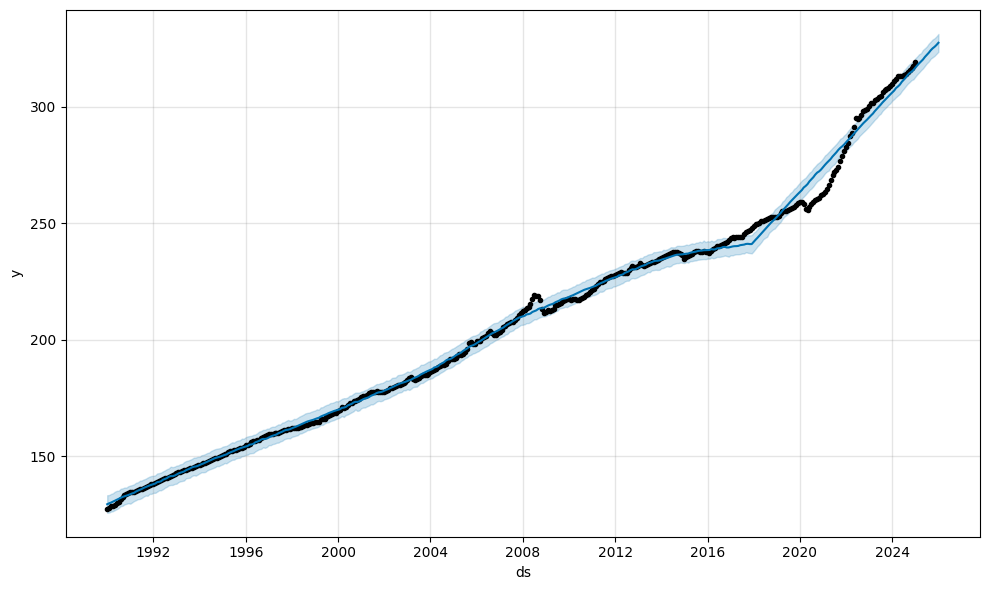

In [32]:
fig = ml.plot(result)

The black dotted lines are actual values from the dataset and the blue solid line is Predicted value(yhat). The shaded blue is the range between yhat_lower and yhat_upper

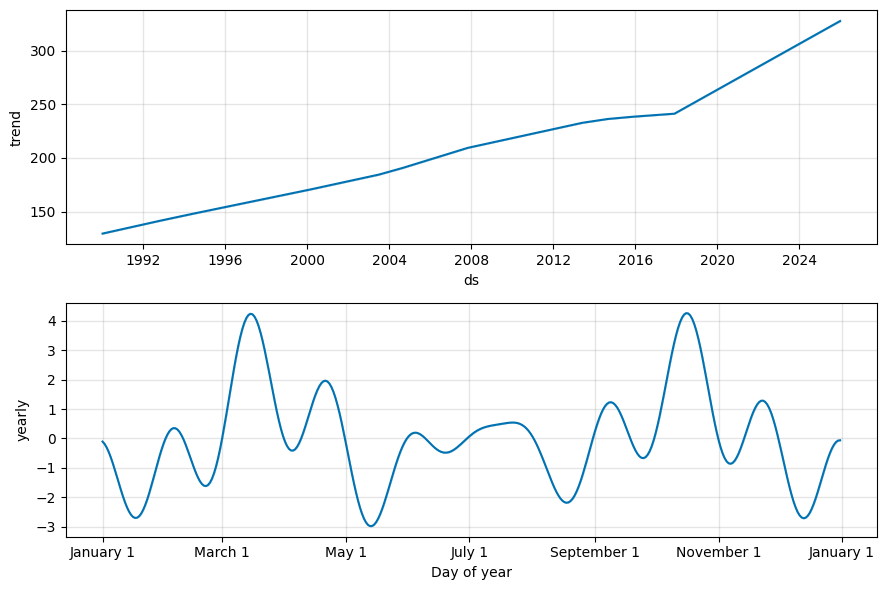

In [33]:
fig2 = ml.plot_components(result)

In [36]:
#Cross-validation
from prophet.diagnostics import cross_validation, performance_metrics

cv_results = cross_validation(model=ml, initial = pd.to_timedelta(30*20, unit= 'D'), period= pd.to_timedelta(30*5, unit= 'D'),horizon = pd.to_timedelta(30*12, unit= 'D'))

df_p = performance_metrics(cv_results)



INFO:prophet:Making 79 forecasts with cutoffs between 1991-12-26 00:00:00 and 2024-01-07 00:00:00


  0%|          | 0/79 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplxacrdq7/w4jenv9d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplxacrdq7/y_z14svt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92218', 'data', 'file=/tmp/tmplxacrdq7/w4jenv9d.json', 'init=/tmp/tmplxacrdq7/y_z14svt.json', 'output', 'file=/tmp/tmplxacrdq7/prophet_model1k5tcpck/prophet_model-20250225030900.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:09:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:09:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplxacrdq7/vns1bqgk.json
DEBUG:cmdstanpy:input tempfi

In [38]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,17.066087,4.131112,2.366538,0.009798,0.006043,0.009858,0.215054
1,38 days,17.218915,4.149568,2.395211,0.009958,0.006158,0.010014,0.215054
2,39 days,17.468871,4.179578,2.439463,0.010134,0.006176,0.010191,0.215054
3,40 days,17.473449,4.180125,2.449018,0.010173,0.006176,0.010230,0.211470
4,41 days,17.239431,4.152039,2.421168,0.010025,0.006257,0.010085,0.218638
...,...,...,...,...,...,...,...,...
319,356 days,43.486078,6.594397,4.058218,0.016532,0.013191,0.016733,0.372760
320,357 days,44.547048,6.674357,4.166206,0.016845,0.014271,0.017052,0.365591
321,358 days,40.981833,6.401705,3.941191,0.016011,0.013191,0.016196,0.387097
322,359 days,41.029754,6.405447,3.956391,0.016111,0.013427,0.016296,0.381720


/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



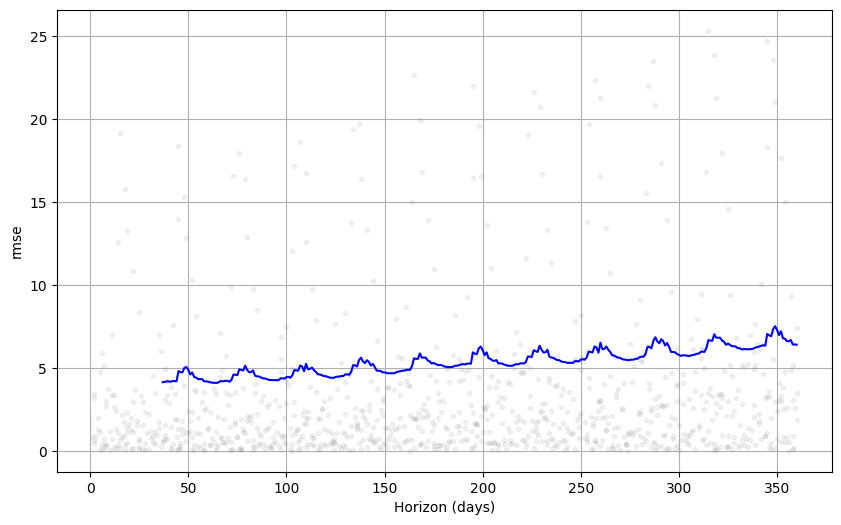

In [37]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cv_results, metric='rmse') #Plots Root Mean Squared Error (RMSE) over different forecast horizons. RMSE measures how much the model's predictions deviate from actual values.

The RMSE graph suggests that the model maintains a relatively stable error range (4–7) across different forecast horizons, with a slight increase in RMSE for longer-term predictions.The model performs consistently without extreme error variations, indicating good generalization over time.

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



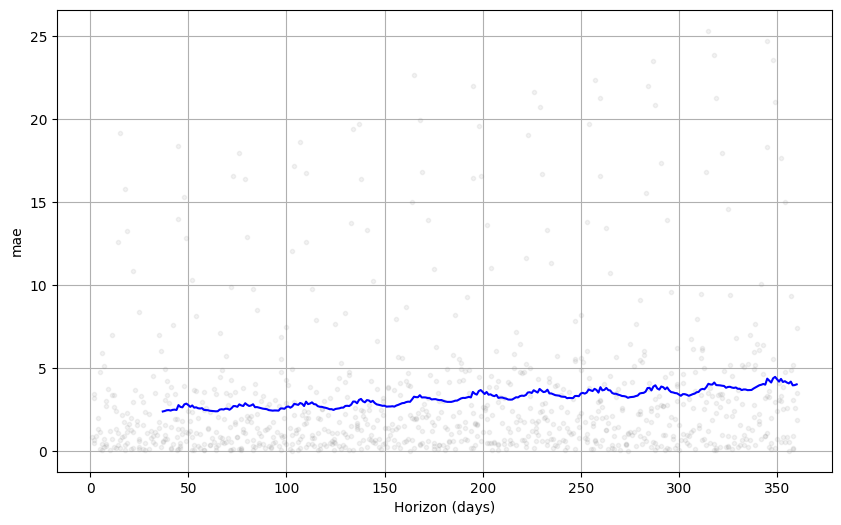

In [39]:
fig = plot_cross_validation_metric(cv_results, metric='mae') #Plots Mean Absolute Error (MAE) to measure how far predictions are from actual values. MAE is the average absolute difference between predicted and actual values.

This shows that the model is performing well and it shows low prediction error. Thus the model generalizes well to future periods.